# Proyek Analisis Data: Kualitas Udara
- **Nama:** Bimantyoso
- **Email:** bimantyosohamdikatam@gmail.com

## Menentukan Pertanyaan Bisnis

- Menganalisa tren polutan PM2.5 di lokasi Aotizhongxin, Tiantan, dan Shunyi?
- Bagaimana tren perubahan kualitas udara di lokasi Aotizhongxin, Tiantan, dan Shunyi selama beberapa tahun terakhir?

## Import Semua Packages/Library yang Digunakan

In [ ]:
!pip install streamlit

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
import requests
import zipfile
import io
from google.colab import drive

## Data Wrangling

### Gathering Data

In [2]:
# URL file ZIP
url_zip = "https://drive.google.com/uc?id=1RhU3gJlkteaAQfyn9XOVAz7a5o1-etgr"

# Mengunduh file ZIP dari URL
response = requests.get(url_zip)
zip_content = response.content

# Menyimpan file ZIP ke sistem file lokal
zip_filename = "data.zip"
with open(zip_filename, "wb") as f:
    f.write(zip_content)

# Membaca file ZIP yang telah disimpan
with zipfile.ZipFile(zip_filename, 'r') as zip_file:
    # Mengekstrak dan membaca setiap file CSV di dalam file ZIP
    for file_name in zip_file.namelist():
        if file_name.endswith('.csv'):
            with zip_file.open(file_name) as file:
                df = pd.read_csv(file)
                print(f"Isi file {file_name}:")
                print(df.head())
                print("\n")

Isi file PRSA_Data_20130301-20170228/PRSA_Data_Aotizhongxin_20130301-20170228.csv:
   No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0  -0.7   
1   2  2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0  -1.1   
2   3  2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0  -1.1   
3   4  2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0  -1.4   
4   5  2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0  -2.0   

     PRES  DEWP  RAIN   wd  WSPM       station  
0  1023.0 -18.8   0.0  NNW   4.4  Aotizhongxin  
1  1023.2 -18.2   0.0    N   4.7  Aotizhongxin  
2  1023.5 -18.2   0.0  NNW   5.6  Aotizhongxin  
3  1024.5 -19.4   0.0   NW   3.1  Aotizhongxin  
4  1025.2 -19.5   0.0    N   2.0  Aotizhongxin  


Isi file PRSA_Data_20130301-20170228/PRSA_Data_Changping_20130301-20170228.csv:
   No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0

In [3]:

# URL file ZIP
url_zip = "https://drive.google.com/uc?id=1RhU3gJlkteaAQfyn9XOVAz7a5o1-etgr"

# Mengunduh file ZIP dari URL
response = requests.get(url_zip)
zip_content = response.content

# Menyimpan file ZIP ke sistem file lokal
zip_filename = "data.zip"
with open(zip_filename, "wb") as f:
    f.write(zip_content)

# Membaca file ZIP yang telah disimpan
with zipfile.ZipFile(zip_filename, 'r') as zip_file:
    # Mengekstrak dan membaca setiap file CSV di dalam file ZIP
    for file_name in zip_file.namelist():
        if file_name.endswith('.csv'):
            # Menyederhanakan nama file CSV
            simplified_name = file_name.split('/')[-1]
            print(f"Isi file {simplified_name}:")
            with zip_file.open(file_name) as file:
                df = pd.read_csv(file)
                print(df.head())
                print("\n")



Isi file PRSA_Data_Aotizhongxin_20130301-20170228.csv:
   No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0  -0.7   
1   2  2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0  -1.1   
2   3  2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0  -1.1   
3   4  2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0  -1.4   
4   5  2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0  -2.0   

     PRES  DEWP  RAIN   wd  WSPM       station  
0  1023.0 -18.8   0.0  NNW   4.4  Aotizhongxin  
1  1023.2 -18.2   0.0    N   4.7  Aotizhongxin  
2  1023.5 -18.2   0.0  NNW   5.6  Aotizhongxin  
3  1024.5 -19.4   0.0   NW   3.1  Aotizhongxin  
4  1025.2 -19.5   0.0    N   2.0  Aotizhongxin  


Isi file PRSA_Data_Changping_20130301-20170228.csv:
   No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    3.0   6.0  13.0   7.0  3

### Assessing Data

In [4]:
# Menampilkan informasi dasar tentang data
print("Informasi Dasar tentang Data:")
print(df.info())

# Menampilkan statistik deskriptif untuk data numerik
print("\nStatistik Deskriptif untuk Data Numerik:")
print(df.describe())

# Menampilkan jumlah baris dan kolom dalam data
print("\nJumlah Baris dan Kolom dalam Data:")
print(df.shape)

# Menampilkan jumlah nilai yang hilang (missing values) dalam setiap kolom
print("\nJumlah Nilai yang Hilang dalam Setiap Kolom:")
print(df.isnull().sum())

# Menampilkan jumlah nilai unik dalam setiap kolom kategorikal
print("\nJumlah Nilai Unik dalam Setiap Kolom Kategorikal:")
print(df.select_dtypes(include=['object']).nunique())

# Menampilkan sampel data secara acak
print("\nSampel Data Secara Acak:")
print(df.sample(5))  # Ubah angka 5 sesuai dengan jumlah sampel yang diinginkan


Informasi Dasar tentang Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34368 non-null  float64
 6   PM10     34580 non-null  float64
 7   SO2      34395 non-null  float64
 8   NO2      34310 non-null  float64
 9   CO       33767 non-null  float64
 10  O3       33986 non-null  float64
 11  TEMP     35045 non-null  float64
 12  PRES     35045 non-null  float64
 13  DEWP     35045 non-null  float64
 14  RAIN     35045 non-null  float64
 15  wd       34985 non-null  object 
 16  WSPM     35051 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB
None

Statistik Deskriptif untuk Data 

In [8]:
# Menggabungkan data frame untuk lokasi Aotizhongxin, Tiantan, dan Shunyi menjadi satu data frame tunggal
df_aotizhongxin = pd.read_csv('ao.csv')
df_tiantan = pd.read_csv('tiantan.csv')
df_shunyi = pd.read_csv('shunyi.csv')
df_all = pd.concat([df_aotizhongxin, df_tiantan, df_shunyi])

# Assesing Data untuk semua lokasi yang dipilih
print("Assessing Data untuk Lokasi Aotizhongxin, Tiantan, dan Shunyi:")
print(df_all.info())
print(df_all.describe())
print(df_all.isnull().sum())



Assessing Data untuk Lokasi Aotizhongxin, Tiantan, dan Shunyi:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 105192 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       105192 non-null  int64  
 1   year     105192 non-null  int64  
 2   month    105192 non-null  int64  
 3   day      105192 non-null  int64  
 4   hour     105192 non-null  int64  
 5   PM2.5    102677 non-null  float64
 6   PM10     103329 non-null  float64
 7   SO2      101843 non-null  float64
 8   NO2      102060 non-null  float64
 9   CO       100112 non-null  float64
 10  O3       101141 non-null  float64
 11  TEMP     105101 non-null  float64
 12  PRES     105101 non-null  float64
 13  DEWP     105098 non-null  float64
 14  RAIN     105101 non-null  float64
 15  wd       104550 non-null  object 
 16  WSPM     105120 non-null  float64
 17  station  105192 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory

In [9]:
# Menyimpan DataFrame sebagai file CSV
df_all.to_csv('all_data.csv', index=False)


In [10]:
all_data = pd.read_csv('all_data.csv')

all_data.columns

Index(['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2',
       'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station'],
      dtype='object')

In [11]:
print(all_data.head(10))

   No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0  -0.7   
1   2  2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0  -1.1   
2   3  2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0  -1.1   
3   4  2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0  -1.4   
4   5  2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0  -2.0   
5   6  2013      3    1     5    5.0   5.0  18.0  18.0  400.0  66.0  -2.2   
6   7  2013      3    1     6    3.0   3.0  18.0  32.0  500.0  50.0  -2.6   
7   8  2013      3    1     7    3.0   6.0  19.0  41.0  500.0  43.0  -1.6   
8   9  2013      3    1     8    3.0   6.0  16.0  43.0  500.0  45.0   0.1   
9  10  2013      3    1     9    3.0   8.0  12.0  28.0  400.0  59.0   1.2   

     PRES  DEWP  RAIN   wd  WSPM       station  
0  1023.0 -18.8   0.0  NNW   4.4  Aotizhongxin  
1  1023.2 -18.2   0.0    N   4.7  Aotizhongxin  
2  10

### Cleaning Data

In [15]:
# Import library
from sklearn.impute import SimpleImputer

# Inisialisasi SimpleImputer dengan strategi 'mean' untuk kolom numerik
numerical_imputer = SimpleImputer(strategy='mean')

# Kolom-kolom numerik
numerical_columns = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']

# Imputasi nilai numerik
all_data[numerical_columns] = numerical_imputer.fit_transform(all_data[numerical_columns])

# Inisialisasi SimpleImputer dengan strategi 'most_frequent' untuk kolom kategorikal
categorical_imputer = SimpleImputer(strategy='most_frequent')

# Kolom kategorikal
categorical_columns = ['wd']

# Imputasi nilai kategorikal
all_data[categorical_columns] = categorical_imputer.fit_transform(all_data[categorical_columns])

# Periksa kembali jumlah nilai yang hilang setelah imputasi
print(all_data.isnull().sum())


No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64


In [16]:
# Kolom-kolom yang berpotensi memiliki outliers
outlier_columns = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']

# Fungsi untuk membersihkan outliers
def remove_outliers(df):
    for col in outlier_columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Hapus outliers
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Membersihkan outliers dari df_all
all_data_cleaned = remove_outliers(all_data)

# Menampilkan informasi tentang data setelah membersihkan outliers
print("Info setelah membersihkan outliers:")
print(all_data_cleaned.info())


Info setelah membersihkan outliers:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 71886 entries, 0 to 105191
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       71886 non-null  int64  
 1   year     71886 non-null  int64  
 2   month    71886 non-null  int64  
 3   day      71886 non-null  int64  
 4   hour     71886 non-null  int64  
 5   PM2.5    71886 non-null  float64
 6   PM10     71886 non-null  float64
 7   SO2      71886 non-null  float64
 8   NO2      71886 non-null  float64
 9   CO       71886 non-null  float64
 10  O3       71886 non-null  float64
 11  TEMP     71886 non-null  float64
 12  PRES     71886 non-null  float64
 13  DEWP     71886 non-null  float64
 14  RAIN     71886 non-null  float64
 15  wd       71886 non-null  object 
 16  WSPM     71886 non-null  float64
 17  station  71886 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 10.4+ MB
None


In [17]:
# Periksa nilai unik dalam kolom "wd"
unique_values_wd = all_data_cleaned['wd'].unique()
print("Unique values in 'wd' column:", unique_values_wd)


Unique values in 'wd' column: ['NNW' 'NW' 'N' 'NNE' 'ENE' 'E' 'NE' 'W' 'SSW' 'WSW' 'SE' 'WNW' 'SSE' 'S'
 'SW' 'ESE']


In [18]:
# Definisikan peta konversi arah angin ke sudut dalam derajat
wind_direction_mapping = {
    'N': 0,
    'NNE': 22.5,
    'NE': 45,
    'ENE': 67.5,
    'E': 90,
    'ESE': 112.5,
    'SE': 135,
    'SSE': 157.5,
    'S': 180,
    'SSW': 202.5,
    'SW': 225,
    'WSW': 247.5,
    'W': 270,
    'WNW': 292.5,
    'NW': 315,
    'NNW': 337.5
}

# Konversi nilai arah angin ke sudut dalam derajat
all_data_cleaned['wd_degrees'] = all_data_cleaned['wd'].map(wind_direction_mapping)

# Periksa hasil konversi
print(all_data_cleaned[['wd', 'wd_degrees']].head())


    wd  wd_degrees
0  NNW       337.5
3   NW       315.0
4    N         0.0
5    N         0.0
6  NNE        22.5


In [19]:
# Identifikasi variasi dalam cara menyebut lokasi
station_varieties = all_data_cleaned['station'].unique()

# Cetak variasi dalam cara menyebut lokasi
print("Variasi dalam cara menyebut lokasi:")
print(station_varieties)

# Tentukan standar penyebutan yang akan digunakan
standard_station_names = {
    'Aotizhongxin': 'Aotizhongxin',
    'Tiantan': 'Tiantan',
    'Shunyi': 'Shunyi'
}

# Ubah penyebutan yang tidak konsisten menjadi standar yang baru
all_data_cleaned['station'] = all_data_cleaned['station'].map(standard_station_names)

# Periksa hasil perubahan
print("\nData setelah penyebutan konsisten:")
print(all_data_cleaned['station'].unique())


Variasi dalam cara menyebut lokasi:
['Aotizhongxin' 'Tiantan' 'Shunyi']

Data setelah penyebutan konsisten:
['Aotizhongxin' 'Tiantan' 'Shunyi']


## Exploratory Data Analysis (EDA)

<ipython-input-20-027b122766c2>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_avg = all_data_cleaned.groupby(['month', 'station']).mean().reset_index()


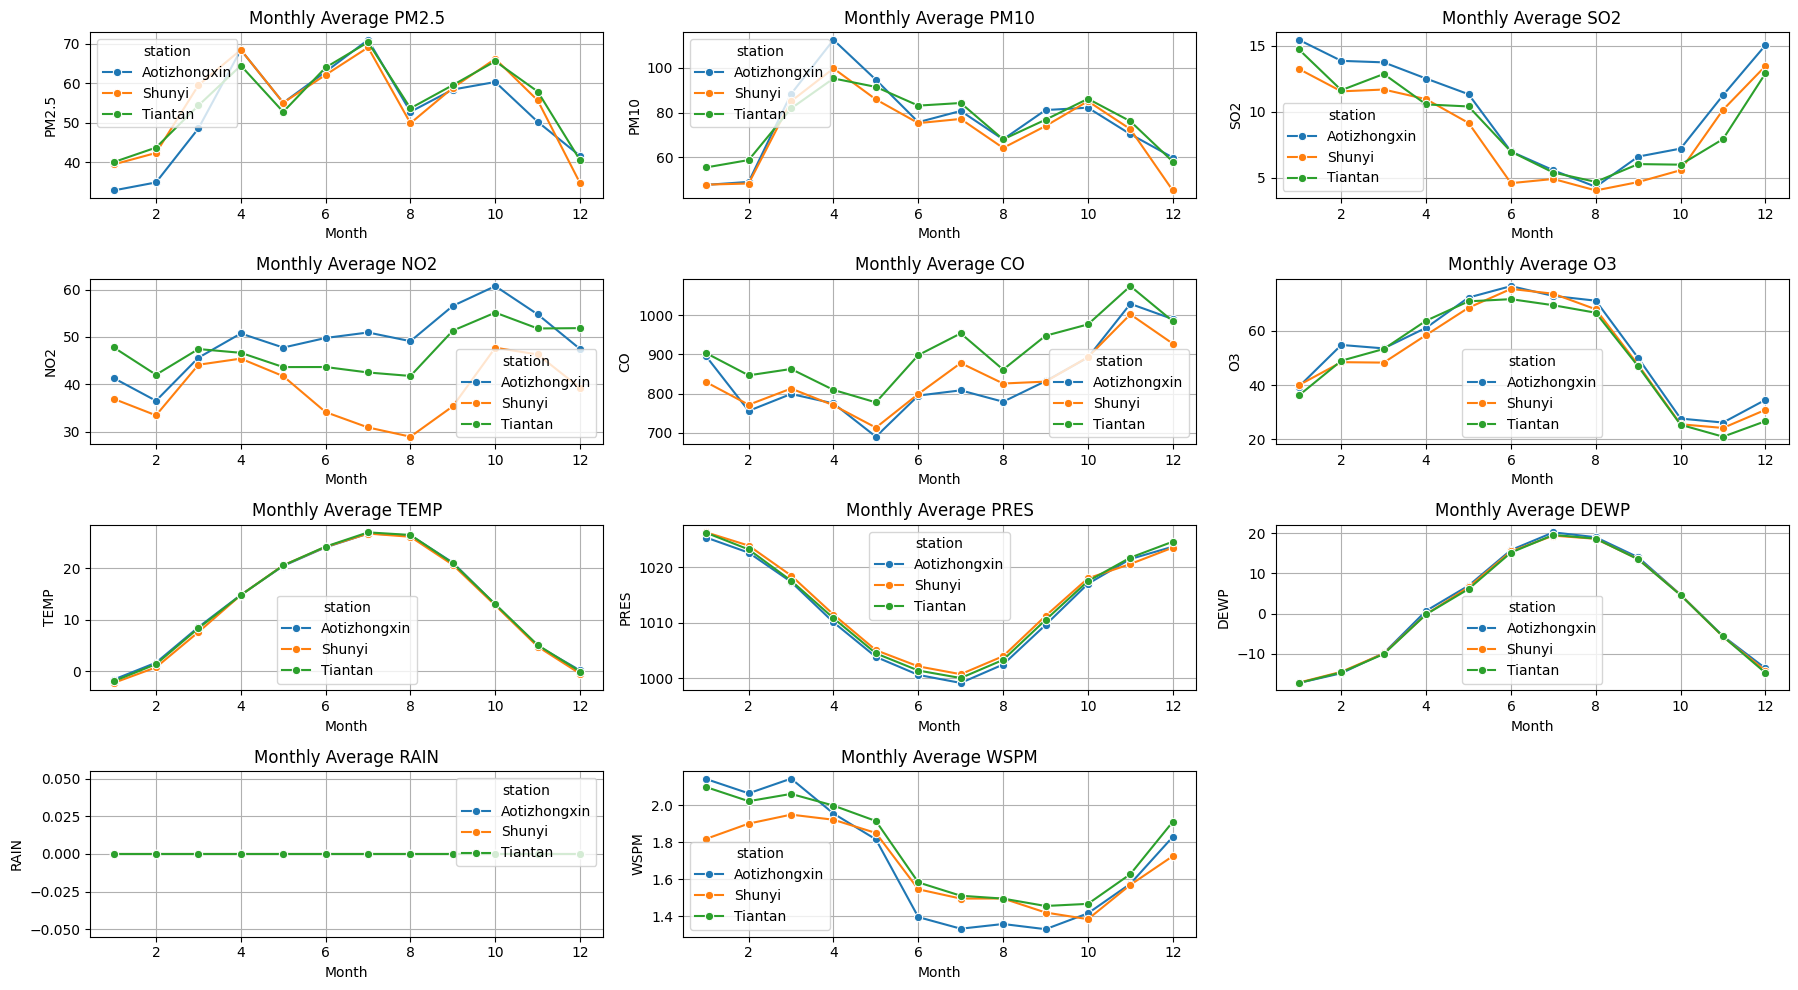

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Kelompokkan data berdasarkan bulan dan hitung rata-rata bulanan untuk setiap parameter kualitas udara
monthly_avg = all_data_cleaned.groupby(['month', 'station']).mean().reset_index()

# Buat plot untuk menampilkan pola musiman dari rata-rata bulanan
plt.figure(figsize=(18, 10))

# List parameter kualitas udara yang akan diplot
parameters = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']

# Loop melalui setiap parameter dan buat subplot untuk setiap parameter
for i, param in enumerate(parameters, 1):
    plt.subplot(4, 3, i)
    sns.lineplot(data=monthly_avg, x='month', y=param, hue='station', marker='o')
    plt.title(f'Monthly Average {param}')
    plt.xlabel('Month')
    plt.ylabel(param)
    plt.grid(True)

plt.tight_layout()
plt.show()


In [21]:
# Memeriksa apakah data rata-rata kolom RAIN untuk stasiun Aotizongxin tersedia
rain_aotizhongxin_available = not all_data_cleaned[all_data_cleaned['station'] == 'Aotizhongxin']['RAIN'].isnull().all()
print("Apakah data rata-rata kolom RAIN untuk stasiun Aotizongxin tersedia?", rain_aotizhongxin_available)

# Memeriksa apakah data rata-rata kolom RAIN untuk stasiun Tiantan tersedia
rain_tiantan_available = not all_data_cleaned[all_data_cleaned['station'] == 'Tiantan']['RAIN'].isnull().all()
print("Apakah data rata-rata kolom RAIN untuk stasiun Tiantan tersedia?", rain_tiantan_available)


Apakah data rata-rata kolom RAIN untuk stasiun Aotizongxin tersedia? True
Apakah data rata-rata kolom RAIN untuk stasiun Tiantan tersedia? True


In [22]:
# Menyimpan DataFrame sebagai file CSV
all_data_cleaned.to_csv('all_data_clean.csv', index=False)

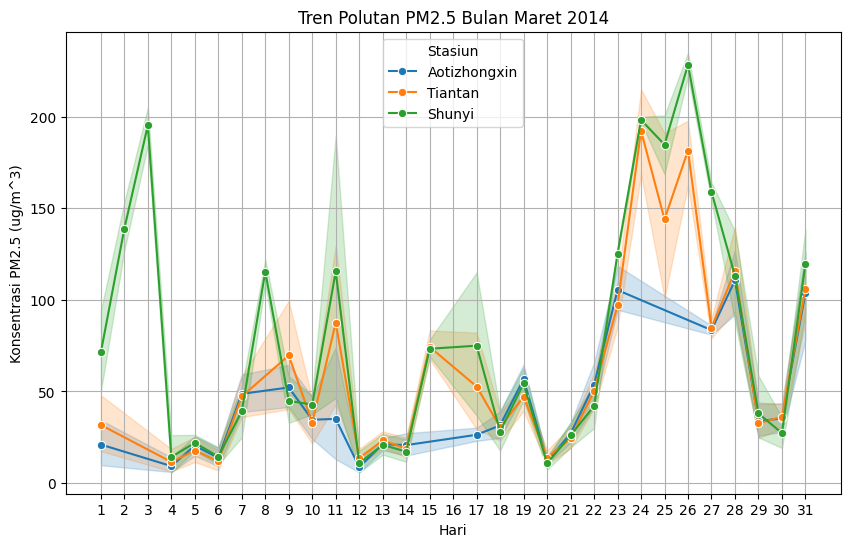

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data untuk bulan Maret 2014
march_2014_data = all_data_cleaned[(all_data_cleaned['year'] == 2014) & (all_data_cleaned['month'] == 3)]

# Filter data untuk stasiun Aotizhongxin, Tiantan, dan Shunyi
selected_stations = ['Aotizhongxin', 'Tiantan', 'Shunyi']
march_2014_selected_stations = march_2014_data[march_2014_data['station'].isin(selected_stations)]

# Plot tren polutan PM2.5
plt.figure(figsize=(10, 6))
sns.lineplot(data=march_2014_selected_stations, x='day', y='PM2.5', hue='station', marker='o')
plt.title('Tren Polutan PM2.5 Bulan Maret 2014')
plt.xlabel('Hari')
plt.ylabel('Konsentrasi PM2.5 (ug/m^3)')
plt.xticks(range(1, 32))
plt.grid(True)
plt.legend(title='Stasiun')
plt.show()


In [24]:

# Menghitung total polutan PM2.5 pada bulan Maret 2014
total_polutan_pm25 = march_2014_selected_stations['PM2.5'].sum()

# Menghitung rata-rata polutan PM2.5 pada bulan Maret 2014
rata_rata_polutan_pm25 = march_2014_selected_stations['PM2.5'].mean()

# Menampilkan total polutan dan rata-rata polutan PM2.5
print("Total Polutan PM2.5 pada Bulan Maret 2014:", total_polutan_pm25)
print("Rata-rata Polutan PM2.5 pada Bulan Maret 2014:", rata_rata_polutan_pm25)


Total Polutan PM2.5 pada Bulan Maret 2014: 54904.478138239334
Rata-rata Polutan PM2.5 pada Bulan Maret 2014: 45.67760244445868
